# Import Libraries

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Problem Definition


> This notebook is a part of the Kaggle "[LLM - Detect AI Generated Text](https://www.kaggle.com/competitions/llm-detect-ai-generated-text/overview)" competition



This competition challenges participants to develop a machine learning model that can accurately detect whether an essay was written by a student or an LLM. The competition dataset comprises a mix of student-written essays and essays generated by a variety of LLMs.



# Dataset

## Dataset Link
[LLM - Detect AI Generated Text Dataset](https://www.kaggle.com/competitions/llm-detect-ai-generated-text/data)
## Dataset Description


* All of the essays were written in response to one of **seven essay prompts**.
* For each prompt, the subject (student or LLM) is given a list of source text to read and write their response from
  - Students were instructed to read one or more source texts and then write a response.
  - Participants of the competition should use the prompts and source text (provided in "train_prompts.csv") to generate AI generated Essays
* The **training set** includes just answers from two prompts, Essays from two of the prompts compose the **training set**, while the answers for the other 5 compose the **hidden test set**.
* Nearly all of the training set essays were written by students, with only a few generated essays given as examples.
* Participants of the competition are responsible to generate more essays to use as training data.



> **Note**: This is a Code Competition. The data in `test_essays.csv` is dummy data to help you author your solutions. When your submission is scored, this example test data will be replaced with the full test set. There are about **9,000 essays** in the test set, both student-written and LLM-generated.




## File structure
---

#### `{test|train}_essays.csv`
- `id` - A unique identifier for each essay.
- `prompt_id` - Identifies the prompt the essay was written in response to.
- `text` - The essay text itself.
- `generated` - Whether the essay was written by a student (`0`) or generated by an LLM (`1`). This field is the target and is **not present** in `test_essays.csv`.



---



#### `train_prompts.csv`
- This file is not important for training.
- It is provided in the competition to be used for LLM essay generation.

Essays were written in response to information in these fields:

- `prompt_id` - A unique identifier for each prompt.
- `prompt_name` - The title of the prompt.
- `instructions` - The instructions given to students.
- `source_text` - The text of the article(s) the essays were written in response to, in Markdown format.

  - **Format Details**:
    - Significant paragraphs are enumerated by a numeral preceding the paragraph on the same line, such as `0 Paragraph one.\n\n1 Paragraph two...`
    - Essays may reference a paragraph by its numeral.
    - Each article is preceded with its title in a heading, formatted as `# Title`.
    - When an author is indicated, their name will appear in the title after the word **by**.
    - Articles may also include subheadings formatted as `## Subheading`. Not all articles have authors indicated.

---


## Load Training Data

In [ ]:
BASE_PATH = '/content'

In [ ]:
import zipfile
with zipfile.ZipFile('llm-detect-ai-generated-text.zip', 'r') as zip_ref:
    zip_ref.extractall('llm-detect-ai-generated-text')

In [ ]:
train_data = pd.read_csv(f'{BASE_PATH}/llm-detect-ai-generated-text/train_essays.csv')


In [ ]:
train_prompts = pd.read_csv(f'{BASE_PATH}/llm-detect-ai-generated-text/train_prompts.csv')

## Exploratory Data Analysis

In [ ]:
train_data.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [ ]:
train_data.text[0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB


In [ ]:
train_data.describe()

,prompt_id,generated
count,1378.000000,1378.000000
mean,0.486212,0.002177
std,0.499991,0.046625
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [ ]:
train_data["generated"].unique()

array([0, 1])

Note:
- "Generated" has only two classes {0,1} or {not generated, generated}
- The Standard Deviation of this class is 0.04
- This means that the data biased towards the one class {not generated}




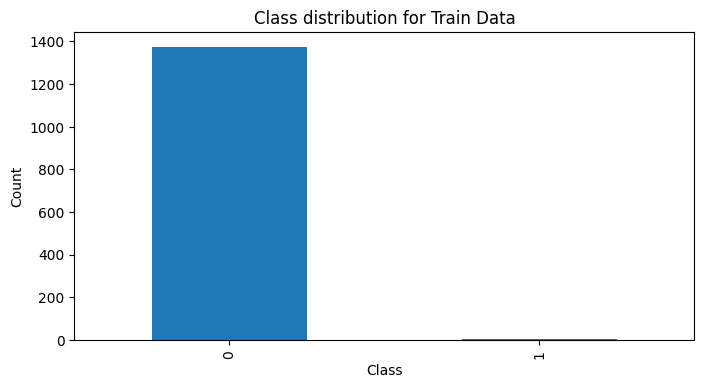

In [ ]:
# Show distribution of answers using a bar plot
plt.figure(figsize=(8, 4))
train_data.generated.value_counts().plot.bar()
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class distribution for Train Data")
plt.show()

## Notes
As shown in the diagram above, the data provided by the kaggle competition is skewed. There is no enough data for AI-generated Text

Accordingaly, we will either
- search for a completely new dataset
- or try to balance the dataset by augmenting AI-generated Text


# Train_prompts.csv

In [ ]:
train_prompts.head()

,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [ ]:
train_prompts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prompt_id     2 non-null      int64 
 1   prompt_name   2 non-null      object
 2   instructions  2 non-null      object
 3   source_text   2 non-null      object
dtypes: int64(1), object(3)
memory usage: 192.0+ bytes


In [ ]:
train_prompts.prompt_id.unique()

array([0, 1])

In [ ]:
train_prompts.instructions[0]

'Write an explanatory essay to inform fellow citizens about the advantages of limiting car usage. Your essay must be based on ideas and information that can be found in the passage set. Manage your time carefully so that you can read the passages; plan your response; write your response; and revise and edit your response. Be sure to use evidence from multiple sources; and avoid overly relying on one source. Your response should be in the form of a multiparagraph essay. Write your essay in the space provided.'

In [ ]:
train_prompts.instructions[1]

'Write a letter to your state senator in which you argue in favor of keeping the Electoral College or changing to election by popular vote for the president of the United States. Use the information from the texts in your essay. Manage your time carefully so that you can read the passages; plan your response; write your response; and revise and edit your response. Be sure to include a claim; address counterclaims; use evidence from multiple sources; and avoid overly relying on one source. Your response should be in the form of a multiparagraph essay. Write your response in the space provided.'

In [ ]:
train_prompts.source_text[0]

'# In German Suburb, Life Goes On Without Cars by Elisabeth Rosenthal\n\n1 VAUBAN, Germany—Residents of this upscale community are suburban pioneers, going where few soccer moms or commuting executives have ever gone before: they have given up their cars.\n\n2 Street parking, driveways and home garages are generally forbidden in this experimental new district on the outskirts of Freiburg, near the French and Swiss borders. Vauban’s streets are completely “car-free”—except the main thoroughfare, where the tram to downtown Freiburg runs, and a few streets on one edge of the community. Car ownership is allowed, but there are only two places to park—large garages at the edge of the development, where a car-owner buys a space, for $40,000, along with a home.\n\n3 As a result, 70 percent of Vauban’s families do not own cars, and 57 percent sold a car to move here. “When I had a car I was always tense. I’m much happier this way,” said Heidrun Walter, a media trainer and mother of two, as she 

In [ ]:
train_prompts.source_text[1]

"# What Is the Electoral College? by the Office of the Federal Register\n\n1 The Electoral College is a process, not a place. The founding fathers established it in the Constitution as a compromise between election of the President by a vote in Congress and election of the President by a popular vote of qualified citizens.\n\n2 The Electoral College process consists of the selection of the electors, the meeting of the electors where they vote for President and Vice President, and the counting of the electoral votes by Congress.\n\n3 The Electoral College consists of 538 electors. A majority of 270 electoral votes is required to elect the President. Your state’s entitled allotment of electors equals the number of members in its Congressional delegation: one for each member in the House of Representatives plus two for your Senators. . . .\n\n4 Under the 23rd Amendment of the Constitution, the District of Columbia is allocated 3 electors and treated like a state for purposes of the Electo

# Dataset Augmentation

- Due to the class imbalance between human and AI generated text, we have made data augmentation
- Using the same prompts and text sources that were hended to humans to write their responses, we have created a new dataset of AI-generated Text
-  We have used openai's GPT-3.5-turbo-0125 model API
-  The model was given prompted with the each of the two prompts provided in the training dataset, along with the source text that it will use to write its answer from (same procedure as with humans)
-  This was done by prompt engineering the openai API. The code used can be found in the project repo (/data_augmentation/dataset_augmentation.py)

The generated dataset is name "ai_generated.csv"

In [ ]:
augmented_data = pd.read_csv(f'{BASE_PATH}/ai_generated.csv')


In [ ]:
augmented_data

,id,prompt_id,text,generated
0,0,0,"In recent years, there has been a growing tren...",1
1,1,0,Limiting car usage in cities can bring about n...,1
2,2,0,Limiting car usage in cities can bring about n...,1
3,3,0,Limiting car usage in cities can bring about n...,1
4,4,0,Car-free cities offer numerous advantages that...,1
...,...,...,...,...
1395,1395,1,"Dear Senator,\n\nI am writing to express my su...",1
1396,1396,1,"Dear State Senator,\n\nI am writing to express...",1
1397,1397,1,"Dear Senator,\n\nI am writing to you today to ...",1
1398,1398,1,"Dear Senator,\n\nI am writing to express my su...",1


## Concatinate Data

In [ ]:
result_df = pd.concat([train_data, augmented_data], ignore_index=True)


In [ ]:
result_df

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
2773,1395,1,"Dear Senator,\n\nI am writing to express my su...",1
2774,1396,1,"Dear State Senator,\n\nI am writing to express...",1
2775,1397,1,"Dear Senator,\n\nI am writing to you today to ...",1
2776,1398,1,"Dear Senator,\n\nI am writing to express my su...",1


In [ ]:
result_df.describe()

,prompt_id,generated
count,2778.000000,2778.000000
mean,0.493161,0.505040
std,0.500043,0.500065
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2778 entries, 0 to 2777
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         2778 non-null   object
 1   prompt_id  2778 non-null   int64 
 2   text       2778 non-null   object
 3   generated  2778 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 86.9+ KB


In [ ]:
result_df.prompt_id.unique()

array([0, 1])

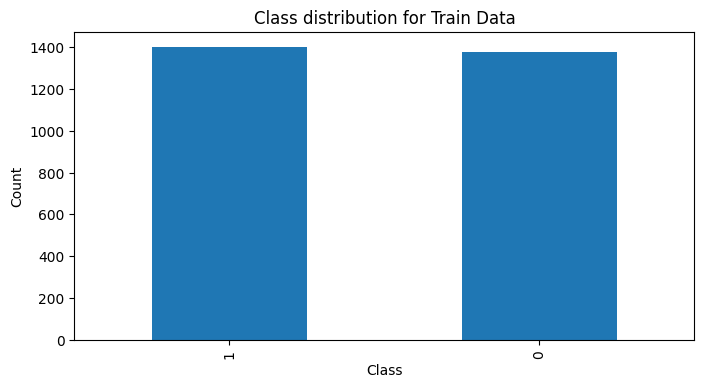

In [ ]:
# Show distribution of answers using a bar plot
plt.figure(figsize=(8, 4))
result_df.generated.value_counts().plot.bar()
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class distribution for Train Data")
plt.show()

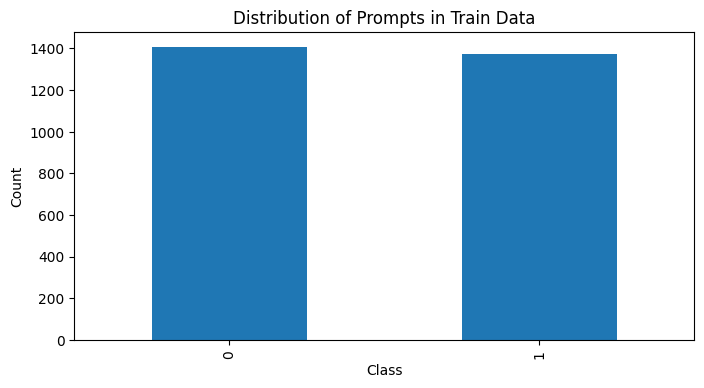

In [ ]:
# Show distribution of answers using a bar plot
plt.figure(figsize=(8, 4))
result_df.prompt_id.value_counts().plot.bar()
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Prompts in Train Data")
plt.show()

In [ ]:
file_path = '/content/AI_Human.csv'

In [ ]:
df_new = pd.read_csv(file_path)

In [ ]:
result_df

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
2773,1395,1,"Dear Senator,\n\nI am writing to express my su...",1
2774,1396,1,"Dear State Senator,\n\nI am writing to express...",1
2775,1397,1,"Dear Senator,\n\nI am writing to you today to ...",1
2776,1398,1,"Dear Senator,\n\nI am writing to express my su...",1


In [ ]:
df_new

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0
...,...,...
487230,Tie Face on Mars is really just a big misunder...,0.0
487231,The whole purpose of democracy is to create a ...,0.0
487232,I firmly believe that governments worldwide sh...,1.0
487233,I DFN't agree with this decision because a LFT...,0.0


In [ ]:
df_new['generated'] = df_new['generated'].astype(int)

In [ ]:
df_new

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
487230,Tie Face on Mars is really just a big misunder...,0
487231,The whole purpose of democracy is to create a ...,0
487232,I firmly believe that governments worldwide sh...,1
487233,I DFN't agree with this decision because a LFT...,0


In [ ]:
# Features to select from each DataFrame
features_result_df = ['text', 'generated']
features_df_new = ['text', 'generated']

# Select columns
result_df_selected = result_df[features_result_df]
df_new_selected = df_new[features_df_new]

# Concatenate the selected columns
combined_df = pd.concat([result_df_selected, df_new_selected], ignore_index=True)

In [ ]:
combined_df

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
490008,Tie Face on Mars is really just a big misunder...,0
490009,The whole purpose of democracy is to create a ...,0
490010,I firmly believe that governments worldwide sh...,1
490011,I DFN't agree with this decision because a LFT...,0


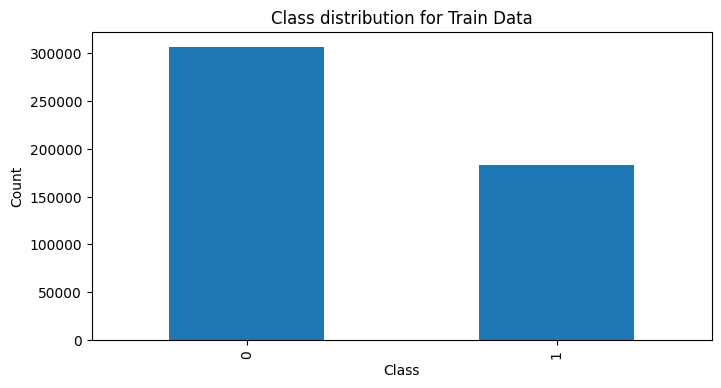

In [ ]:
# Show distribution of answers using a bar plot
plt.figure(figsize=(8, 4))
combined_df.generated.value_counts().plot.bar()
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class distribution for Train Data")
plt.show()

# Data cleaning

Remove special characters, numbers, and extra whitespaces, and convert text to lowercase.

In [ ]:
import re

def clean_text(text):
    """
    Cleans the text by removing unwanted characters while retaining periods, commas,
    question marks, and exclamation marks. Converts text to lowercase.
    """
    # Keep only letters, spaces, periods, commas, question marks, and exclamation marks
    text = re.sub(r"[^a-zA-Z\s.,!?]", "", text)
    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    # Convert to lowercase
    return text.lower()

# Apply the cleaning function to the 'text' column
combined_df['cleaned_text'] = combined_df['text'].apply(clean_text)

# Preview the cleaned text
print(result_df[['text', 'cleaned_text']].head())


                                                text  \
0  Cars. Cars have been around since they became ...   
1  Transportation is a large necessity in most co...   
2  "America's love affair with it's vehicles seem...   
3  How often do you ride in a car? Do you drive a...   
4  Cars are a wonderful thing. They are perhaps o...   

                                        cleaned_text  
0  cars. cars have been around since they became ...  
1  transportation is a large necessity in most co...  
2  americas love affair with its vehicles seems t...  
3  how often do you ride in a car? do you drive a...  
4  cars are a wonderful thing. they are perhaps o...  


# Tokenization

=>  Split the text into tokens (words or subwords) for further analysis.

The nltk.word_tokenize function from the punkt tokenizer will split the input string into words and preserve punctuation marks as separate tokens.

In [ ]:
from nltk.tokenize import word_tokenize
import nltk

# Download the tokenizer if not already available
nltk.download('punkt')
nltk.download('punkt_tab')


# Tokenize the text
combined_df['tokens'] = combined_df['cleaned_text'].apply(word_tokenize)

# Preview tokenized text
print(combined_df[['cleaned_text', 'tokens']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


KeyboardInterrupt: 

# Text Vectorization

Convert the processed text into numerical format.

## Explanation of Parameters

- **`lowercase=True`**: Converts all text to lowercase.

- **`stop_words='english'`**: Removes common English stopwords.

- **`token_pattern`**:
  - The default regex (`r"(?u)\b\w\w+\b"`) matches tokens of 2 or more characters.
  - The adjusted regex (`r"(?u)\b\w+\b"`) includes single-character tokens, which can be important for retaining punctuation marks like `.` or `?`.

- **`ngram_range=(1, 1)`**: Specifies unigrams (individual words). You can adjust to include bigrams (`(2, 2)`) or a range (`(1, 2)`).

- **`max_features=5000`**: Limits the number of tokens to the top 5,000 by TF-IDF score. Remove this parameter if you don't want a limit.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the custom vectorizer
vectorizer = TfidfVectorizer(
    lowercase=True,                   # Convert text to lowercase
    stop_words='english',             # Remove stopwords
    token_pattern=r"(?u)\b\w+\b",     # Tokenization pattern to match words
    ngram_range=(1, 1),               # Use unigrams (single words); adjust for n-grams
    max_features=100                 # Limit the number of features (optional)
)

# Apply the vectorizer to your cleaned text column
X_tfidf = vectorizer.fit_transform(combined_df['text'])

# Get the feature names (tokens) generated by the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Print the feature names and TF-IDF matrix
print("Feature names:", feature_names[:10])  # Show first 10 tokens
print("TF-IDF matrix shape:", X_tfidf.shape)


Feature names: ['able' 'activities' 'advice' 'air' 'article' 'author' 'believe'
 'benefits' 'best' 'better']
TF-IDF matrix shape: (490013, 100)


In [ ]:
X_tfidf

<490013x100 sparse matrix of type '<class 'numpy.float64'>'
	with 10047187 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_tfidf)

  (0, 11)	0.8033816664623881
  (0, 18)	0.17546084841663961
  (0, 59)	0.08513145898055181
  (0, 51)	0.20327891544154428
  (0, 10)	0.07796478606720568
  (0, 90)	0.04885918280847374
  (0, 35)	0.15580430002561022
  (0, 85)	0.15465273918980252
  (0, 91)	0.2024919846416763
  (0, 50)	0.09940350678943338
  (0, 4)	0.18518754816788563
  (0, 49)	0.030645682704244795
  (0, 77)	0.07128715685563035
  (0, 13)	0.044748589176763144
  (0, 53)	0.02590078597279602
  (0, 74)	0.038141197932694076
  (0, 71)	0.07697777830136254
  (0, 52)	0.03852007937064526
  (0, 23)	0.16451633883719147
  (0, 88)	0.0743820965121482
  (0, 56)	0.06148678092797873
  (0, 64)	0.19384539758192548
  (0, 3)	0.09468092265767061
  (0, 39)	0.042669210036719266
  (0, 73)	0.0210118359495738
  :	:
  (490012, 53)	0.03600145460542949
  (490012, 73)	0.1460296724025731
  (490012, 37)	0.05021330346393323
  (490012, 57)	0.18036282572082446
  (490012, 86)	0.046538171733051595
  (490012, 17)	0.04176836929709222
  (490012, 81)	0.06910555184368478
 

The output of `TfidfVectorizer` is a **sparse matrix** where each row represents a document (in your case, a piece of text), and each column corresponds to a token (word or n-gram) extracted during the vectorization process. The values in this matrix represent the **TF-IDF scores** for each token in each document.

---

### **Breaking Down the Output**

#### **1. Sparse Matrix**
The output is a sparse matrix of shape `(n_samples, n_features)`, where:
- `n_samples` = Number of documents (rows in your dataset).
- `n_features` = Number of unique tokens (columns, also called the vocabulary size).

For example, if you have 5 text samples and the vectorizer identifies 10 unique tokens, the matrix shape will be `(5, 10)`.

#### **2. TF-IDF Scores**
Each value in the matrix is the **TF-IDF score** for a specific token in a specific document. This score indicates the importance of the token in that document relative to the entire corpus.

The formula for TF-IDF is:
\[
\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)
\]

- **Term Frequency (TF)**: How often a term \(t\) appears in a document \(d\), normalized by the total number of terms in \(d\).
- **Inverse Document Frequency (IDF)**: Measures how unique a term is across all documents. It's calculated as:
  \[
  \text{IDF}(t) = \log \frac{N}{1 + n_t}
  \]
  where \(N\) is the total number of documents, and \(n_t\) is the number of documents containing term \(t\).

#### **3. Feature Names**
The vectorizer also provides the names of the tokens (features) it extracted. You can get them using:
```python
feature_names = vectorizer.get_feature_names_out()


In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Initialize TF-IDF vectorizer
# tfidf_vectorizer = TfidfVectorizer()
# X_tfidf = tfidf_vectorizer.fit_transform(result_df['tokens'])

# # View feature names and transformed text
# print(tfidf_vectorizer.get_feature_names_out())
# print(X_tfidf.toarray())


# Split the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,                   # Feature matrix from TfidfVectorizer
    combined_df['generated'],         # Target labels (0 = human, 1 = AI-generated)
    test_size=0.3,             # 30% of the data for testing
    random_state=42,           # For reproducibility
    stratify=combined_df['generated'] # Maintain class distribution
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (343009, 100)
Test set shape: (147004, 100)


# Classification

In this section, we will be trying more than one approach for this binary classification problem.

Possible Approaches
* Classical ML
* Deep ML


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the logistic regression model
model = LogisticRegression(max_iter=50, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


# Calculate accuracies
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")




Training Accuracy: 90.27%
Test Accuracy: 90.18%


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9017985905145438

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92     92152
           1       0.89      0.85      0.87     54852

    accuracy                           0.90    147004
   macro avg       0.90      0.89      0.89    147004
weighted avg       0.90      0.90      0.90    147004



Confusion Matrix:
 [[86165  5987]
 [ 8449 46403]]


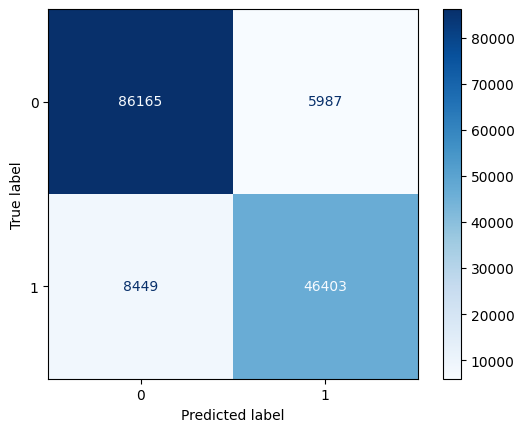

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = model.predict(X_test)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the raw confusion matrix
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')  # Adjust `cmap` for a color scheme
